To run or to test use test cell below the train

In [ ]:
ADD DATASET HERE___ NAME = dataset.zip

In [ ]:
pip install opendatasets

In [ ]:
pip install pandas


In [ ]:
!unzip /content/dataset.zip -d /content/dataset


In [ ]:
#/content/Early_blight/
#/content/Leaf_miner/
#/content/Mealy_bug/
#/content/healthy/

In [ ]:
!pip install split-folders


In [ ]:
import splitfolders

input_folder = "/content/dataset"  # Path to your dataset
output_folder = "/content/split_dataset"  # Output folder path

splitfolders.ratio(input_folder, output=output_folder,
                   seed=42, ratio=(0.8, 0.2),
                   group_prefix=None, move=False)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

In [ ]:
import sys

# Custom condition to raise an error (you can modify it as needed)
stop_execution = True

if stop_execution:
    sys.exit("⚠️ Warning : Train again.")


SystemExit: ⚠️ Warning : Train again.

**Train** dataset below

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input, Reshape, Multiply
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Path to your dataset
train_dir = '/content/split_dataset/train'
val_dir = '/content/split_dataset/val'

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Function to create SE block
def squeeze_excite_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling2D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, 1, filters))(se)
    return Multiply()([input_tensor, se])

# Add custom layers with SE block
x = base_model.output
x = squeeze_excite_block(x)  # Add SE block after base model
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Save the model
model.save('/content/inceptionv3_model_with_se.h5')

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')


**Inorder to test run only below code**






```

```

**RUN HERE::**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

In [ ]:


# Download the file using its ID

!pip install -q gdown
!gdown --id 1qGOO7Z4RhxLEcOJVV92YW2WlYyBs3tSP



/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1qGOO7Z4RhxLEcOJVV92YW2WlYyBs3tSP
From (redirected): https://drive.google.com/uc?id=1qGOO7Z4RhxLEcOJVV92YW2WlYyBs3tSP&confirm=t&uuid=661c48c8-5690-4081-8ede-5c3fc7bcfedd
To: /content/inceptionv3_model_with_se.h5
100% 120M/120M [00:02<00:00, 48.4MB/s]


Saving images (1).jfif to images (1).jfif


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


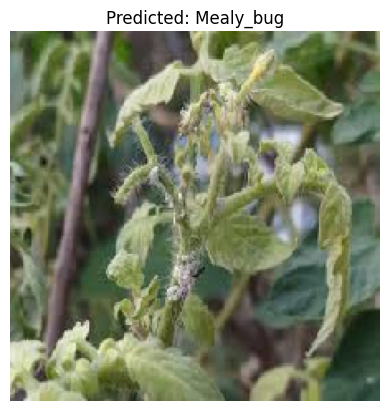

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Load the trained model
model = load_model('/content/inceptionv3_model_with_se.h5')

# Upload image
uploaded = files.upload()

for filename in uploaded.keys():
    # Load the image
    img = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict the class
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_name = ['Early_blight', 'Leaf_miner', 'Mealy_bug', 'Healthy'][class_idx]

    # Display the image with prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {class_name}')
    plt.show()
    # Delete the uploaded file
    os.remove(filename)

**checking with random diseases not to excute same code repeated**

Saving LEAF_MINER_TOMATO_2.jpg to LEAF_MINER_TOMATO_2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


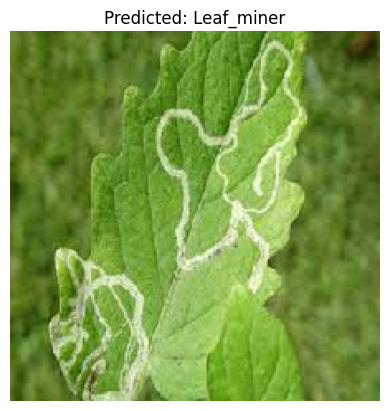

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Load the trained model
model = load_model('/content/inceptionv3_model_with_se.h5')

# Upload image
uploaded = files.upload()

for filename in uploaded.keys():
    # Load the image
    img = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict the class
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_name = ['Early_blight', 'Leaf_miner', 'Mealy_bug', 'Healthy'][class_idx]

    # Display the image with prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {class_name}')
    plt.show()
    # Delete the uploaded file
    os.remove(filename)

Saving download.jfif to download.jfif
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


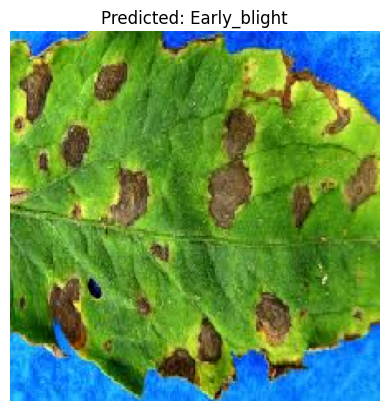

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Load the trained model
model = load_model('/content/inceptionv3_model_with_se.h5')

# Upload image
uploaded = files.upload()

for filename in uploaded.keys():
    # Load the image
    img = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict the class
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_name = ['Early_blight', 'Leaf_miner', 'Mealy_bug', 'Healthy'][class_idx]

    # Display the image with prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {class_name}')
    plt.show()
    # Delete the uploaded file
    os.remove(filename)